# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Create a base URL for OpenWeather API calls

base_url = "https://api.openweathermap.org/data/2.5/weather?q="

api_key = f"&appid={weather_api_key}&units=imperial"

In [4]:
for city in cities:
    # Construct URL
    call_url = base_url + city + api_key
    
    try:
        
    # Use URL to retrieve data from OpenWeatherAPI
    
        response = requests.get(call_url)
        weather_data = response.json()
      
    # Write city to display
        print(f'Requesting weather for {city}')
        
    # Create output line
        city = weather_data['name'] 
        lon = weather_data['coord']['lon']
        lat = weather_data['coord']['lat']
        max_temp = weather_data['main']['temp_max']
        humidity = weather_data['main']['humidity']
        cloudiness = weather_data['clouds']['all']
        wind_speed = weather_data['wind']['speed']
        country_code = weather_data['sys']['country']
        date = weather_data['dt']

        line = f'{city}, {lat}, {lon}, {max_temp}, {humidity}, {cloudiness}, {wind_speed}, {country_code}, {date} \n'
    
    # Print output line to CSV
        with open ("output_data/cities.csv", 'a') as file:
            file.write(line)
    
        time.sleep(1)
        
    except:
        print(f"There was an error for {city}")

Requesting weather for linxia
Requesting weather for rikitea
Requesting weather for horsham
Requesting weather for port alfred
Requesting weather for nome
Requesting weather for hithadhoo
Requesting weather for lagos
Requesting weather for castro
Requesting weather for torbay
Requesting weather for new norfolk
Requesting weather for sarangani
Requesting weather for tuktoyaktuk
Requesting weather for bonavista
Requesting weather for tiksi
Requesting weather for bredasdorp
Requesting weather for bluff
Requesting weather for nikolskoye
Requesting weather for albany
Requesting weather for saskylakh
Requesting weather for jamestown
Requesting weather for hervey bay
Requesting weather for lebu
Requesting weather for vaini
Requesting weather for coquimbo
Requesting weather for nizhniy odes
Requesting weather for constitucion
Requesting weather for hermanus
Requesting weather for evensk
Requesting weather for thompson
Requesting weather for nabire
Requesting weather for atar
Requesting weather

Requesting weather for svetlaya
Requesting weather for kapit
Requesting weather for pisco
Requesting weather for hun
There was an error for Hūn
Requesting weather for tapaua
There was an error for tapaua
Requesting weather for faanui
Requesting weather for cabo san lucas
Requesting weather for batagay-alyta
Requesting weather for paamiut
Requesting weather for shimoda
Requesting weather for ostrowiec swietokrzyski
There was an error for Ostrowiec Świętokrzyski
Requesting weather for wanaka
Requesting weather for lianzhou
Requesting weather for babanusah
There was an error for babanusah
Requesting weather for biak
Requesting weather for kidal
Requesting weather for kruisfontein
Requesting weather for rio grande
Requesting weather for ponta do sol
Requesting weather for qom
Requesting weather for east london
Requesting weather for muyezerskiy
Requesting weather for thinadhoo
Requesting weather for severo-kurilsk
Requesting weather for belebey
Requesting weather for puerto del rosario
Req

Requesting weather for port-gentil
Requesting weather for kwekwe
Requesting weather for takoradi
Requesting weather for chaman
Requesting weather for stokmarknes
Requesting weather for pervomayskoye
Requesting weather for sergeyevka
Requesting weather for taoudenni
Requesting weather for dandong
Requesting weather for vila velha
Requesting weather for yining
Requesting weather for umm kaddadah
Requesting weather for vila
Requesting weather for porto nacional
Requesting weather for milingimbi
There was an error for milingimbi
Requesting weather for yola
Requesting weather for xingyi
Requesting weather for am timan
Requesting weather for bathsheba
Requesting weather for bagdarin
Requesting weather for celestun
Requesting weather for udachnyy
Requesting weather for pouebo
Requesting weather for buraydah
Requesting weather for tymovskoye
Requesting weather for potiskum
Requesting weather for chapais
Requesting weather for klaeng
Requesting weather for rengali
There was an error for Rengāli

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
weather_df = pd.read_csv("output_data/cities.csv", encoding = 'latin-1')

weather_df

# Encountered an error where there was an invalid UTC-8 byte in the data. I found a suggestion to try encoding it as 'latin-1'
# from this website: https://bobbyhadz.com/blog/python-unicodedecodeerror-utf-8-codec-cant-decode-byte

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Linxia Chengguanzhen,35.6003,103.2064,69.78,81,96,3.87,CN,1660339551
1,Rikitea,-23.1203,-134.9692,73.18,73,100,23.51,PF,1660339554
2,Horsham,51.0640,-0.3272,76.05,52,0,5.75,GB,1660339557
3,Port Alfred,-33.5906,26.8910,59.13,72,98,15.43,ZA,1660339559
4,Nome,64.5011,-165.4064,51.87,87,100,9.22,US,1660339561
...,...,...,...,...,...,...,...,...,...
504,Graaff-Reinet,-32.2522,24.5308,50.92,74,52,2.98,ZA,1660340624
505,San Quintín,30.4833,-115.9500,76.95,70,13,12.44,MX,1660340625
506,Antofagasta,-23.6500,-70.4000,58.28,80,58,9.40,CL,1660340437
507,Hambantota,6.1241,81.1185,77.34,94,20,2.30,LK,1660340629


In [4]:
weather_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,5.090000e+02
mean,20.182657,15.425749,68.671257,71.473477,53.404715,8.283418,1.660340e+09
std,33.801161,93.075337,14.203572,21.054340,38.025339,5.679901,3.281444e+02
min,-54.800000,-179.166700,32.000000,1.000000,0.000000,0.000000,1.660339e+09
25%,-9.800000,-66.850000,57.560000,63.000000,19.000000,3.940000,1.660340e+09
50%,24.687700,17.691000,69.910000,77.000000,54.000000,7.050000,1.660340e+09
75%,49.650100,102.265500,79.520000,87.000000,94.000000,11.480000,1.660340e+09
max,78.218600,179.316700,104.470000,100.000000,100.000000,31.740000,1.660341e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [78]:
humidity_too_high = weather_df.loc[weather_df["Humidity"] > 100]

In [79]:
#  Get the indices of cities that have humidity over 100%.
index_list = list(humidity_too_high.index)

index_list

[]

In [80]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.drop(labels = index_list, axis = 0, inplace = False)

clean_city_data

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Linxia Chengguanzhen,35.6003,103.2064,69.78,81,96,3.87,CN,1660339551
1,Rikitea,-23.1203,-134.9692,73.18,73,100,23.51,PF,1660339554
2,Horsham,51.0640,-0.3272,76.05,52,0,5.75,GB,1660339557
3,Port Alfred,-33.5906,26.8910,59.13,72,98,15.43,ZA,1660339559
4,Nome,64.5011,-165.4064,51.87,87,100,9.22,US,1660339561
...,...,...,...,...,...,...,...,...,...
504,Graaff-Reinet,-32.2522,24.5308,50.92,74,52,2.98,ZA,1660340624
505,San Quintín,30.4833,-115.9500,76.95,70,13,12.44,MX,1660340625
506,Antofagasta,-23.6500,-70.4000,58.28,80,58,9.40,CL,1660340437
507,Hambantota,6.1241,81.1185,77.34,94,20,2.30,LK,1660340629


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

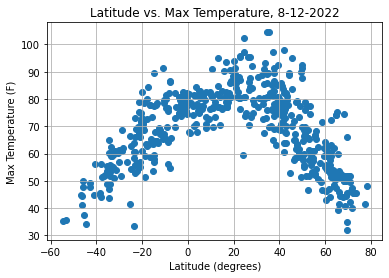

In [86]:
x_axis_lat = clean_city_data["Lat"]
y_axis_maxtemp = clean_city_data["Max Temp"]

plt.scatter(x_axis_lat, y_axis_maxtemp)
plt.title("Latitude vs. Max Temperature, 8-12-2022")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("output_data/lat_maxtemp.png")
plt.show()

In this plot, I am comparing a city's latitude to its maximum temperature on 8-12-2022. On the x-axis, negative latitudes indicate cities south of the equator, while positive latitudes indicate cities north of the equator. 

## Latitude vs. Humidity Plot

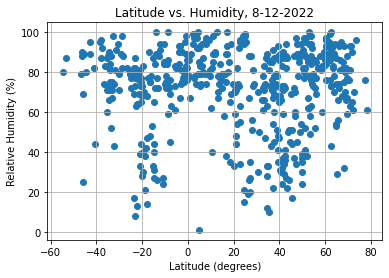

In [85]:
y_axis_hum = clean_city_data["Humidity"]

plt.scatter(x_axis_lat, y_axis_hum)
plt.title("Latitude vs. Humidity, 8-12-2022")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Relative Humidity (%)")
plt.grid(True)

plt.savefig("output_data/lat_hum.png")
plt.show()

In this plot, I'm comparing a city's latitude with its relative humidity. On the x-axis, negative latitudes indicate cities south of the equator, while positive latitudes indicate cities north of the equator. 

## Latitude vs. Cloudiness Plot

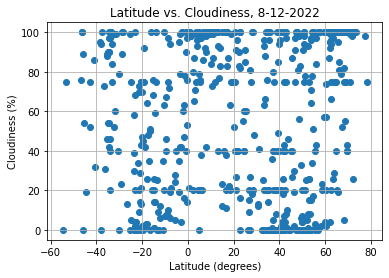

In [83]:
y_axis_clouds = clean_city_data["Cloudiness"]

plt.scatter(x_axis_lat, y_axis_clouds)
plt.title("Latitude vs. Cloudiness, 8-12-2022")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/lat_clouds.png")
plt.show()

In this plot, I'm comparing a city's latitude with the percent cloudiness. Negative latitudes indicate locations in the southern hemisphere, while positive latitudes indicate locations in the northern hemisphere.

## Latitude vs. Wind Speed Plot

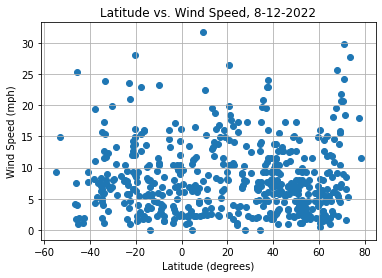

In [84]:
y_axis_wind = clean_city_data["Wind Speed"]

plt.scatter(x_axis_lat, y_axis_wind)
plt.title("Latitude vs. Wind Speed, 8-12-2022")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("output_data/lat_wind.png")
plt.show()

In this graph, I'm comparing a city's latitude with the current wind speed. Most of the data are under 15 miles per hour, and are fairly uniform across latitudes. There are some areas with higher wind speeds, with one "spike" around 65 degrees North latitude.

## Linear Regression

In [55]:
# Separate cities by Northern or Southern Hemisphere

northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] > 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Creating x values for plotting linear regression
x_north = range(0,80)
x_south = range(-60,0)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
# Define Data for graph
x_axis_north = northern_hemisphere["Lat"]
y_axis_maxtempnorth = northern_hemisphere["Max Temp"]

In [115]:
# Calculating the linear regression and forming the linear regression equation
north_maxt_lr = linregress(x_axis_north, y_axis_maxtempnorth)

north_maxtemp_linregress = (north_maxt_lr.slope * x_north) + north_maxt_lr.intercept

print(north_maxt_lr)

LinregressResult(slope=-0.5059501092936942, intercept=90.98674119041691, rvalue=-0.6955766418878279, pvalue=6.655400925383327e-51, stderr=0.028299790060266155, intercept_stderr=1.2673018939517806)


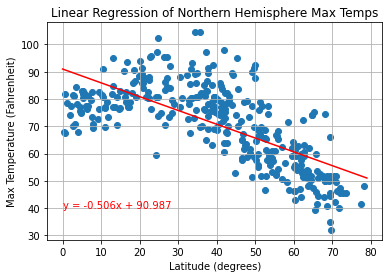

In [76]:
# Create plot
plt.scatter(x_axis_north, y_axis_maxtempnorth)
plt.plot(north_maxtemp_linregress, color = 'r')
plt.title("Linear Regression of Northern Hemisphere Max Temps")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.grid(True)
plt.annotate("y = -0.506x + 90.987", (0,40), color = 'r')

plt.savefig("output_data/northern_maxtemp_linreg.png")
plt.show()

In this graph, I overlay the linear regression equation on the scatter plot of the northern hemisphere maximum temperature data. The linear regression is decreasing in max temperature as latitude increases. This makes sense because temperatures tend to be higher near the equator and lower away from it. From the linear regression, we get an r-value of -0.696 and a p-value of 6.655x10^-51. This indicates that there is a fairly strong negative correlation, and that it is highly unlikely that this happened by chance.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [138]:
# Define Data for graph
x_axis_south = southern_hemisphere["Lat"]

y_axis_maxtempsouth = southern_hemisphere["Max Temp"]

In [139]:
# Calculating the linear regression and forming the linear regression equation
south_maxt_lr = linregress(x_axis_south, y_axis_maxtempsouth)

print(south_maxt_lr)

south_maxtemp_linregress = (south_maxt_lr.slope * x_south) + south_maxt_lr.intercept

LinregressResult(slope=0.7687037911551672, intercept=80.50313146194974, rvalue=0.7987510169070754, pvalue=5.055473264502184e-38, stderr=0.04521453287566871, intercept_stderr=1.1091619071427843)


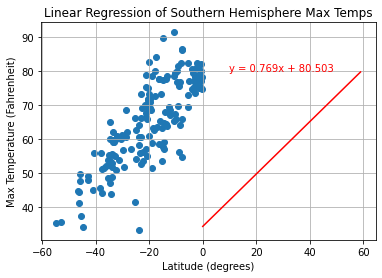

In [160]:
# Create plot

plt.scatter(x_axis_south, y_axis_maxtempsouth)
plt.plot(south_maxtemp_linregress, color = 'r')
plt.title("Linear Regression of Southern Hemisphere Max Temps")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.grid(True)
plt.annotate("y = 0.769x + 80.503", (10,80), color = 'r')

plt.savefig("output_data/south_maxtemps_linreg.png")
plt.show()

In this graph, I overlay the linear regression on the southern hemisphere max temperature data. The line is increasing as you go north, which makes sense for the southern hemisphere. In the southern hemisphere, going north is going toward the equator; temperatures typically increase as one approaches the equator. The r-value is pretty big (0.799), indicating that there is a pretty strong correlation between temperature and latitude. The p-value is also very small (5.055x10^-38), so it is highly unlikely that this distribution occurred by chance.

*I don't know why the regression line is starting at 0 and going into the positive latitudes. I've been fighting with it, but it's the case for all of my southern hemisphere graphs.*

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [88]:
# Define data 

y_axis_hum_north = northern_hemisphere["Humidity"]

In [106]:
# Run the linear regression
north_humidity_linreg = linregress(x_axis_north, y_axis_hum_north)

print(north_humidity_linreg)

north_hum_lr = (north_humidity_linreg.slope * x_north) + north_humidity_linreg.intercept 

LinregressResult(slope=0.010432795024416183, intercept=70.86484457645838, rvalue=0.009731419476754563, pvalue=0.8574864289765165, stderr=0.0580532752712632, intercept_stderr=2.5997021725144207)


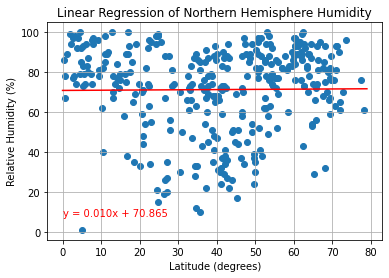

In [119]:
# Plot the data and linear regression

plt.scatter(x_axis_north, y_axis_hum_north)
plt.plot(north_hum_lr, color = 'r')
plt.title("Linear Regression of Northern Hemisphere Humidity")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Relative Humidity (%)")
plt.grid(True)
plt.annotate("y = 0.010x + 70.865", (0,8), color = 'r')

plt.savefig("output_data/north_hum_linreg.png")
plt.show()

In this graph, I overlay the linear regression on the northern hemisphere humidity data. The regression is nearly flat, and stays around 70-75%. This indicates that humidity doesn't tend to change with latitude. The r-value is very low (0.0097), so there is very little correlation evident. The p-value is much higher than 0.05 (0.857), so it is possible that this distribution happened by chance.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [127]:
# Define data

y_axis_hum_south = southern_hemisphere["Humidity"]

In [136]:
# Run the linear regression

south_hum_linreg = linregress(x_axis_south, y_axis_hum_south)

print(south_hum_linreg)

south_hum_lr = (south_hum_linreg.slope * x) + south_hum_linreg.intercept

LinregressResult(slope=0.0748997186147717, intercept=70.3026298997355, rvalue=0.047826780841184156, pvalue=0.5406045687290559, stderr=0.12214897874342025, intercept_stderr=2.9964479471931655)


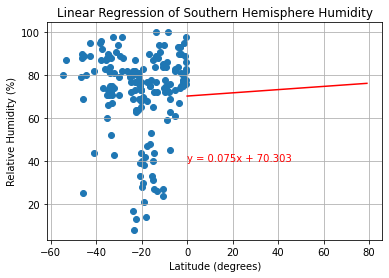

In [154]:
# Plot the data and linear regression

plt.scatter(x_axis_south, y_axis_hum_south)
plt.plot(south_hum_lr, color = 'r')
plt.title("Linear Regression of Southern Hemisphere Humidity")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Relative Humidity (%)")
plt.grid(True)
plt.annotate("y = 0.075x + 70.303", (0,40), color = 'r')

plt.savefig("output_data/south_hum_linreg.png")
plt.show()

In this graph, I overlay the linear regression on the southern hemisphere humidity data. The line is close to flat, indicating there may not be much of a relationship between humidity and the latitude. The r-value is very small (0.048), so there is very little correlation evident. The p-value is also much larger than 0.05 (0.541), so it is conceivable that this distribution happened by chance. 

*I don't know why the regression line is starting at 0 and going into the positive latitudes. I've been fighting with it, but it's the case for all of my southern hemisphere graphs.*

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [144]:
# Define data

y_axis_north_clouds = northern_hemisphere["Cloudiness"]

In [145]:
# Run the linear regression

north_clouds_linreg = linregress(x_axis_north, y_axis_north_clouds)

print(north_clouds_linreg)

north_clouds_lr = (north_clouds_linreg.slope * x_north) + north_clouds_linreg.intercept

LinregressResult(slope=-0.016636514863366262, intercept=55.885143971008695, rvalue=-0.008509248649121212, pvalue=0.8752282603384187, stderr=0.10587129488589546, intercept_stderr=4.741056108130045)


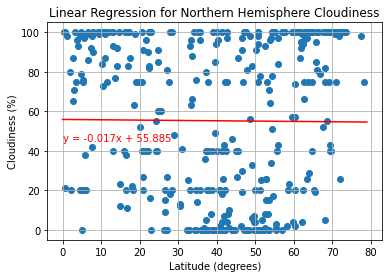

In [151]:
# Plot the data and linear regression

plt.scatter(x_axis_north, y_axis_north_clouds)
plt.plot(north_clouds_lr, color = 'r')
plt.title("Linear Regression for Northern Hemisphere Cloudiness")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.annotate("y = -0.017x + 55.885", (0, 45), color = 'r')

plt.savefig("output_data/north_clouds_linreg.png")
plt.show()

In this graph, I overlay the linear regression over the northern hemisphere cloudiness data. The line is close to flat, indicating there may not be a strong relationship between latitude and cloudiness. The r-value is very small (-0.008), indicating that there is little correlation between the two factors. The p-value is very large (0.875), which indicates that this distribution of cloudiness could be due to chance.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [152]:
# Define data

y_axis_south_clouds = southern_hemisphere["Cloudiness"]

In [153]:
# Run the linear regression

south_clouds_linreg = linregress(x_axis_south, y_axis_south_clouds)

print(south_clouds_linreg)

south_clouds_lr = (south_clouds_linreg.slope * x_south) + south_clouds_linreg.intercept

LinregressResult(slope=-0.5255640981308484, intercept=38.6762953658839, rvalue=-0.1917762519443226, pvalue=0.013315688601403534, stderr=0.21002553854891773, intercept_stderr=5.152156000951776)


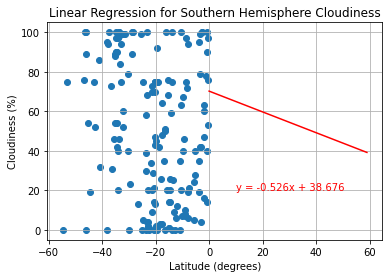

In [163]:
# Plot the data and linear regression

plt.scatter(x_axis_south, y_axis_south_clouds)
plt.plot(south_clouds_lr, color = 'r')
plt.title("Linear Regression for Southern Hemisphere Cloudiness")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.annotate("y = -0.526x + 38.676", (10,20), color = 'r')

plt.savefig("output_data/south_clouds_linreg.png")
plt.show()

In this graph, I overlay the linear regression on the southern hemisphere cloudiness data. The line has a decreasing slope, indicating that cloudiness decreases as you go north (toward the equator). The r-value is pretty small (-0.192), so there doesn't seem to be a strong connection between latitude and cloudiness. The p-value is less than 0.01, so it seems unlikely that this trend would be due to chance.

*I don't know why the regression line is starting at 0 and going into the positive latitudes. I've been fighting with it, but it's the case for all of my southern hemisphere graphs.*

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [165]:
# Define data

y_axis_north_wind = northern_hemisphere["Wind Speed"]

In [166]:
# Run the linear regression

north_wind_linreg = linregress(x_axis_north, y_axis_north_wind)

print(north_wind_linreg)

north_wind_lr = (north_wind_linreg.slope * x_north) + north_wind_linreg.intercept

LinregressResult(slope=0.0019604315041482604, intercept=8.175806038871173, rvalue=0.006808885994895733, pvalue=0.9000141589347563, stderr=0.015591516316511157, intercept_stderr=0.698208648029414)


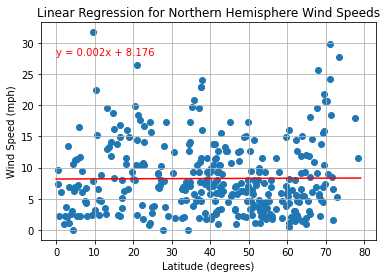

In [172]:
# Plot the data and linear regression

plt.scatter(x_axis_north, y_axis_north_wind)
plt.plot(north_wind_lr, color = 'r')
plt.title("Linear Regression for Northern Hemisphere Wind Speeds")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.annotate("y = 0.002x + 8.176", (0,28), color = 'r')

plt.savefig("output_data/north_wind_linreg.png")
plt.show()

In this graph, I overlay the linear regression over the northern hemisphere wind speed data. The slope is nearly flat, which suggests that wind speed isn't overly reliant on latitude. The r-value is very small (0.007), which indicates that there is not much correlation between the two factors. The p-value is very large (0.900), which indicates that this distribution could have occurred by chance.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [173]:
# Define data

y_axis_winds_south = southern_hemisphere["Wind Speed"]

In [174]:
# Run the linear regression

winds_south_linreg = linregress(x_axis_south, y_axis_winds_south)

print(winds_south_linreg)

winds_south_lr = (winds_south_linreg.slope * x_south) + winds_south_linreg.intercept

LinregressResult(slope=-0.02196143858397651, intercept=7.884665321466346, rvalue=-0.05143605211027923, pvalue=0.5104511465445364, stderr=0.03329629976444674, intercept_stderr=0.8167946232925754)


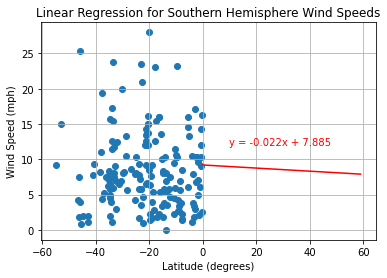

In [177]:
# Plot the data and linear regression

plt.scatter(x_axis_south, y_axis_winds_south)
plt.plot(winds_south_lr, color = 'r')
plt.title("Linear Regression for Southern Hemisphere Wind Speeds")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.annotate("y = -0.022x + 7.885", (10,12), color = 'r')

plt.savefig("output_data/south_wind_linreg.png")
plt.show()

In this graph, I overlay the linear regression on the southern hemisphere wind speeds data. The slope is slightly negative, and it seems like the wind speed doesn't strongly rely on the latitude. The r-value is very small (0.051), which indicates that there isn't a strong correlation between the two factors. The p-value is very large (0.510), which indicates that this distribution could be generated by chance.

*I don't know why the regression line is starting at 0 and going into the positive latitudes. I've been fighting with it, but it's the case for all of my southern hemisphere graphs.*

## Observations/Conclusions



 - On the Latitude vs. Max Temperature graph, I notice that there is an inverted "U"-shape distribution, and the data are clearly grouped together. The highest part of the inverted "U" is around 20 degrees north. This makes sense because it is summer in the northern hemisphere. On the summer solstice, the Sun appears directly overhead at latitude ~23.5 degrees North. The summer solstice (when the Sun is most northerly from the Earth's perspective) was in June, but local temperatures tend to trail by about two months due to the heat capacity of the surface of the Earth. Areas around 23.5 degrees North experience the most direct sunlight in the northern hemisphere summer, so they tend to be some of the hottest areas.
 
 - In the Latitude vs. Cloudiness graph, there doesn't seem to be much of a trend. There is a group where it's nearly 100% cloudy, but that's distributed approximately uniformly across latitudes. There are two smaller groups where it's nearly 0% cloudy, and those are centered around 20 degrees South and 40-60 degrees North. There are some horizontal lines, but those are probably due to common rounding values (20%, 40%, 50%, 75%, etc.). The lack of a trend is borne out by the r-values and p-values calculated from the linear regression.
 
 - In the Latitude vs Humidity graph, I notice that there is a "table-shaped" distribution. There are many points that lie between 60% and 100% humidity, spanning the range of latitudes. There are also two main "legs" of the table where the relative humidity is lower. In the southern hemisphere, this is centered around 20 degrees South latitude, while in the northen hemisphere it is more broad, spanning from about 20 degrees to 60 degrees North latitude. The lack of a large-scale trend is borne out by the r-values and p-values calculated from the linear regressions